In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data():
    # 从文件导入数据
    datafile = 'housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算train数据集的最大值，最小值，平均值
    maximums, minimums, means, stds = \
    training_data.max(axis=0), \
    training_data.min(axis=0), \
    training_data.mean(axis=0),\
    training_data.std(axis=0)
    
    # 对数据进行归一化处理
    for i in range(feature_num):
        data[:,i]=(data[:,i]-means[i])/stds[i]
        
     # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [3]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    # 定义前向计算成员函数
    def forward(self, x):
        z = x.dot(self.w)+self.b
        return z

    # 定义计算损失函数值的成员函数
    def loss(self, z, y):
        error = z-y
        cost = error*error
        cost = np.mean(cost)
        return cost

    # 定义计算梯度的成员函数
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)

        return gradient_w, gradient_b

    def updata(self, gradient_w, gradient_b, eta=0.01):
        self.w -= eta*gradient_w
        self.b -= eta*gradient_b

    def train(self, training_data, num_epoches, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epoches):
            # 在每轮迭代开始之前，将训练数据的顺序随机的打乱，
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k: k+batch_size]
                            for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                z = self.forward(x)
                loss = self.loss(z, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.updata(gradient_w, gradient_b, eta)
                losses.append(loss)
                print(
                    'Epoch {:3d} / iter {:3d}, loss {:.4f}'.format(epoch_id, iter_id, loss))
        return losses

Epoch   0 / iter   0, loss 47.8387
Epoch   0 / iter   1, loss 8.5208
Epoch   0 / iter   2, loss 8.0082
Epoch   0 / iter   3, loss 7.9864
Epoch   0 / iter   4, loss 1.8815
Epoch   1 / iter   0, loss 4.2831
Epoch   1 / iter   1, loss 2.8137
Epoch   1 / iter   2, loss 4.1185
Epoch   1 / iter   3, loss 4.6027
Epoch   1 / iter   4, loss 0.8393
Epoch   2 / iter   0, loss 2.3999
Epoch   2 / iter   1, loss 1.6230
Epoch   2 / iter   2, loss 2.3380
Epoch   2 / iter   3, loss 2.8625
Epoch   2 / iter   4, loss 0.3122
Epoch   3 / iter   0, loss 1.6103
Epoch   3 / iter   1, loss 2.0899
Epoch   3 / iter   2, loss 1.2466
Epoch   3 / iter   3, loss 1.2898
Epoch   3 / iter   4, loss 0.3289
Epoch   4 / iter   0, loss 1.1270
Epoch   4 / iter   1, loss 1.0388
Epoch   4 / iter   2, loss 1.2513
Epoch   4 / iter   3, loss 1.0923
Epoch   4 / iter   4, loss 0.3748
Epoch   5 / iter   0, loss 1.1727
Epoch   5 / iter   1, loss 1.0228
Epoch   5 / iter   2, loss 0.6489
Epoch   5 / iter   3, loss 0.5894
Epoch   5 / i

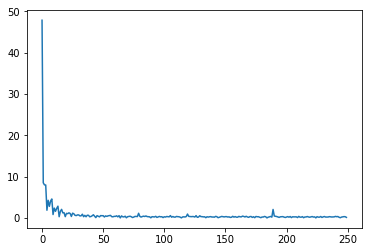

In [4]:
# 获取数据
train_data, test_data = load_data()
# 创建网络
net = Network(13)
# 启动训练
losses = net.train(train_data, num_epoches=50, batch_size=100, eta=0.1)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

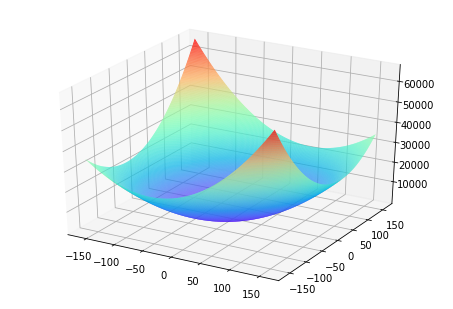

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# 只画出参数w5和w9在区间[-160, 160]的曲线部分，已经包含损失函数的极值
w5 = np.arange(-160.0, 160.0, 1.0)
w9 = np.arange(-160.0, 160.0, 1.0)
losses = np.zeros([len(w5), len(w9)])
x=train_data[:,:-1]
y=train_data[:,-1:]

# 计算设定区域内每个参数取值所对应的Loss
for i in range(len(w5)):
    for j in range(len(w9)):
        net.w[5] = w5[i]
        net.w[9] = w9[j]
        z = net.forward(x)
        loss = net.loss(z, y)
        losses[i, j] = loss

# 将两个变量和对应的Loss作3D图
fig = plt.figure()
ax = Axes3D(fig)

w5, w9 = np.meshgrid(w5, w9)

ax.plot_surface(w5, w9, losses, rstride=1, cstride=1, cmap='rainbow')
plt.show()